# Why Seaborn?
- provides a layer of abstraction hence simpler to use
- better aesthetics
- more graphs included

# Seaborn Roadmap
Types of Functions

- Figure Level
- Axis Level

Main Classification

- Relational Plot
- Distribution Plot
- Categorical Plot
- Regression Plot
- Matrix Plot
- Multiplots
https://seaborn.pydata.org/api.html



1. Relational Plot
- to see the statistical relation between 2 or more variables.
- Bivariate Analysis

Plots under this section

- scatterplot
- lineplot

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

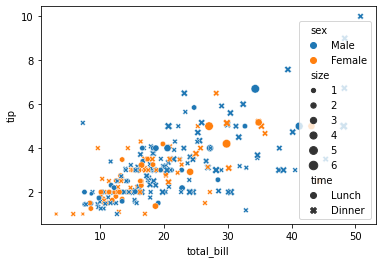

In [12]:
# scatter plot -> axes level function
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='sex',style='time',size='size')

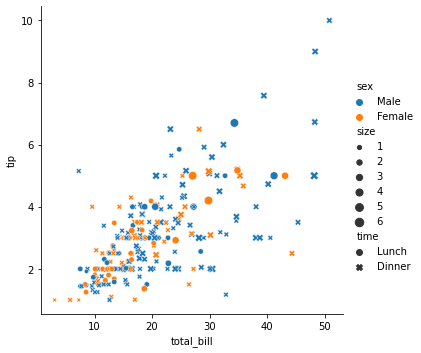

In [14]:
# relplot -> figure level -> square shape
# scatter using relplot -> size,style and hue 
sns.relplot(data=tips,x='total_bill',y='tip',kind='scatter',hue='sex',style='time',size='size')

In [16]:
# line plot
gap = px.data.gapminder()
gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [24]:
temp_df = gap[gap['country']=='India']

<AxesSubplot:xlabel='year', ylabel='lifeExp'>

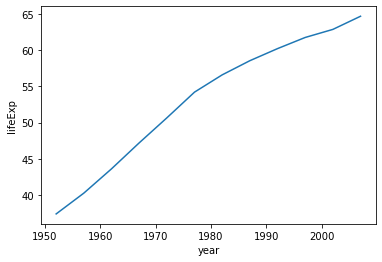

In [19]:
# axes level function
sns.lineplot(data=temp_df, x='year', y='lifeExp')

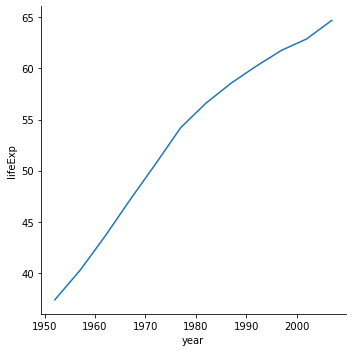

In [20]:
# using relplot
sns.relplot(data=temp_df,x='year',y='lifeExp',kind='line')

In [29]:
# hue -> style
temp_df = gap[gap['country'].isin(['India','Brazil','China','Germany'])]

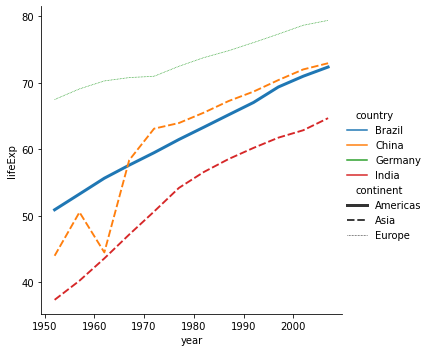

In [35]:
sns.relplot(kind='line',data=temp_df,x='year',y='lifeExp',hue='country',style='continent',size='continent')

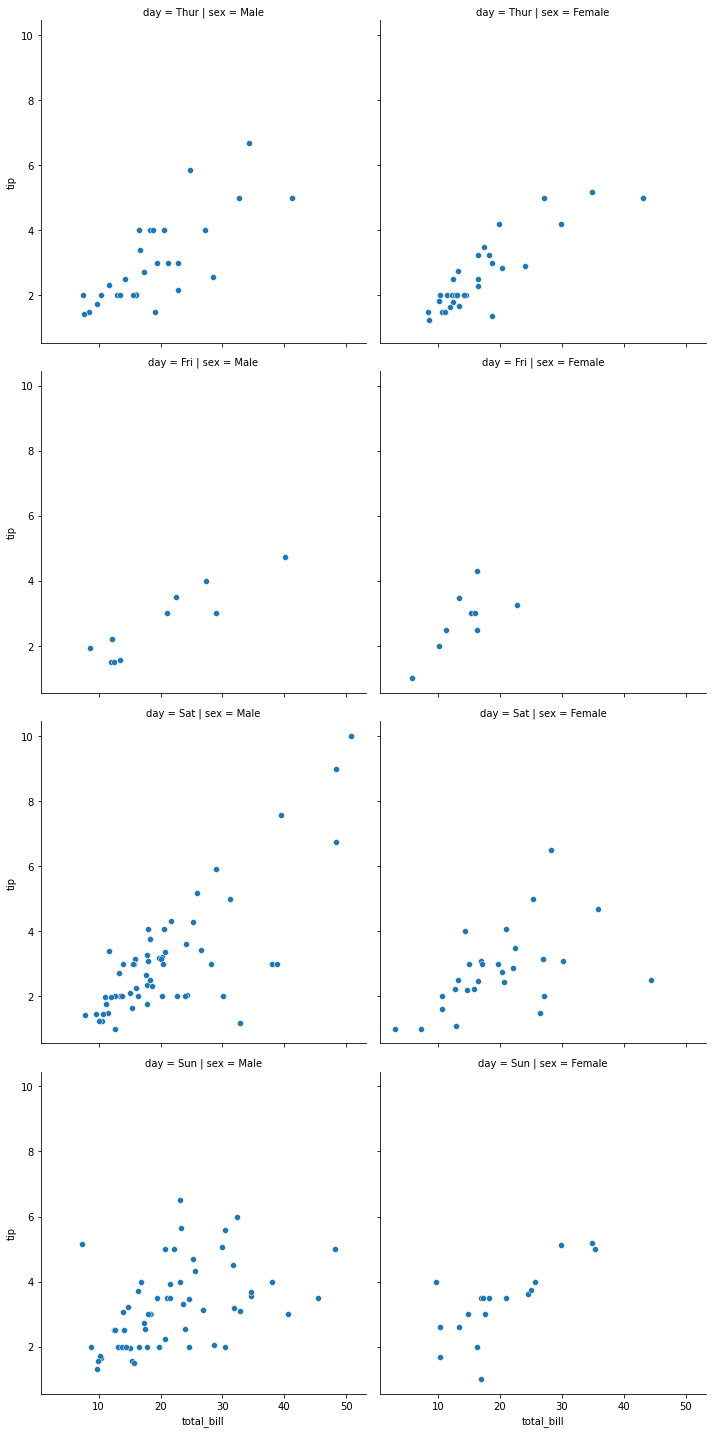

In [42]:
# facet plot -> fig level function -> work with rel plot
# it will not work scatterplot and lineplot
# subplot and facetplot difference is that facetplot are similar kind of graphs of different features
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter', col='sex', row='day')

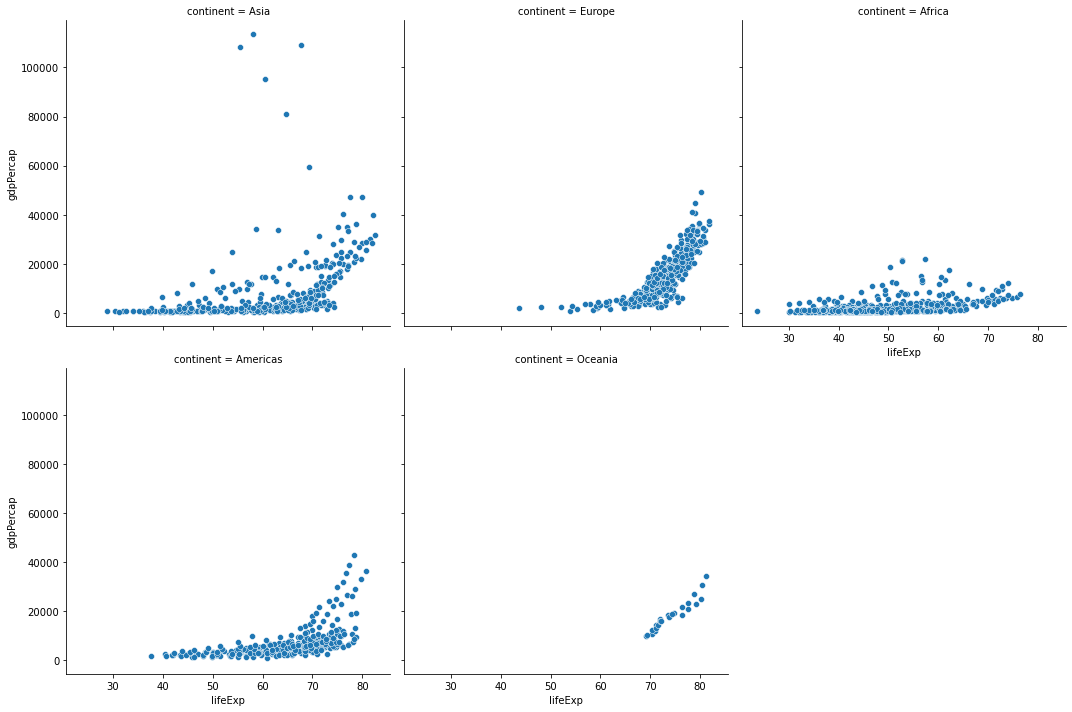

In [49]:
# col wrap
sns.relplot(data=gap, x='lifeExp', kind='scatter', y='gdpPercap', col='continent', col_wrap=3)

## 2. Distribution Plots
- used for univariate analysis
- used to find out the distribution
- Range of the observation
- Central Tendency
- is the data bimodal?
- Are there outliers?

#### Plots under distribution plot

- histplot
- kdeplot
- rugplot

In [50]:
# figure level -> displot
# axes level -> histplot -> kdeplot -> rugplot

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

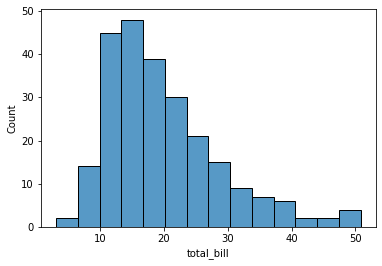

In [51]:
# plotting univariate histogram
# axes level plot
sns.histplot(data=tips, x='total_bill')

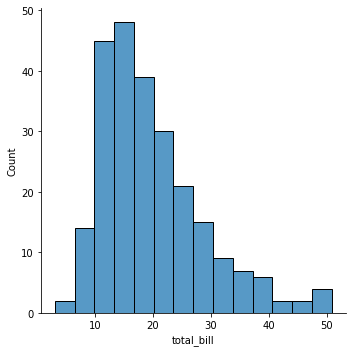

In [52]:
# figure level plot
sns.displot(data=tips,x='total_bill',kind='hist')

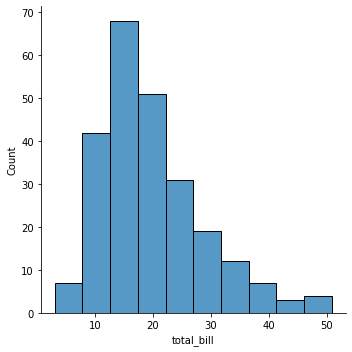

In [111]:
# bins parameter
sns.displot(data=tips,x='total_bill',kind='hist',bins=10)

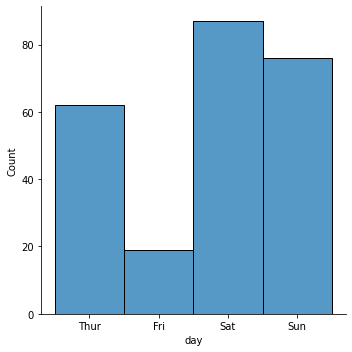

In [58]:
# It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram. 
# Discrete bins are automatically set for categorical variables

# countplot basically acting like one
sns.displot(data=tips,x='day',kind='hist')

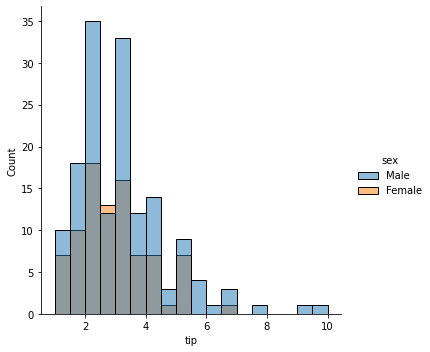

In [60]:
# hue
sns.displot(data=tips,x='tip',kind='hist',hue='sex')

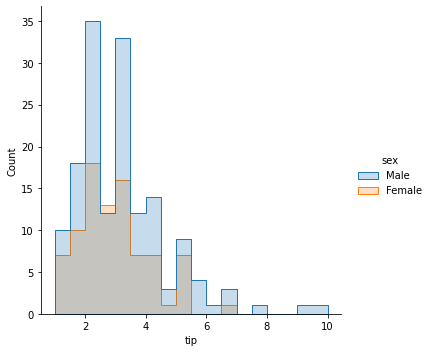

In [61]:
# element -> step
sns.displot(data=tips,x='tip',kind='hist',hue='sex',element='step')

In [63]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


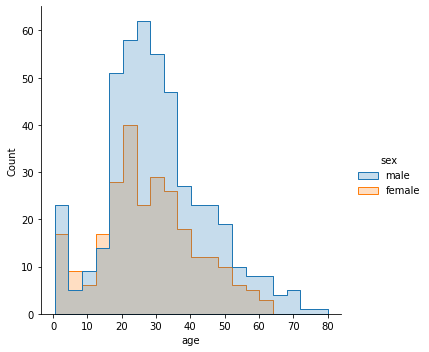

In [65]:
sns.displot(data=titanic,x='age',kind='hist',element='step',hue='sex')

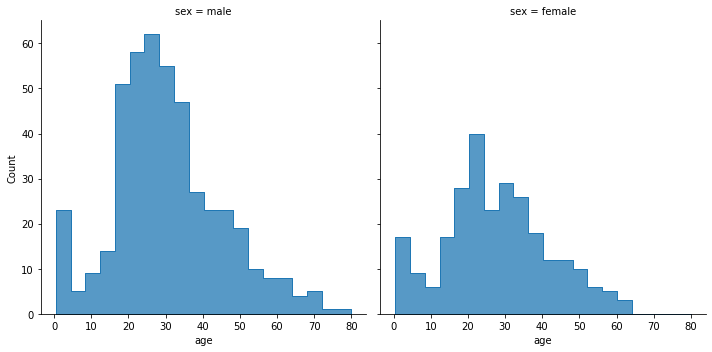

In [66]:
# faceting using col and row -> not work on histogram function
sns.displot(data=titanic,x='age',kind='hist',element='step',col='sex')

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

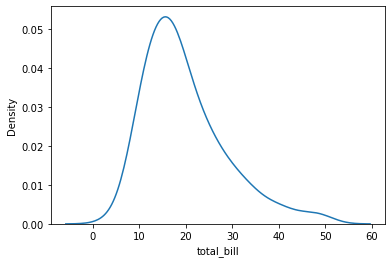

In [67]:
# kdeplot
# Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate
sns.kdeplot(data=tips,x='total_bill')

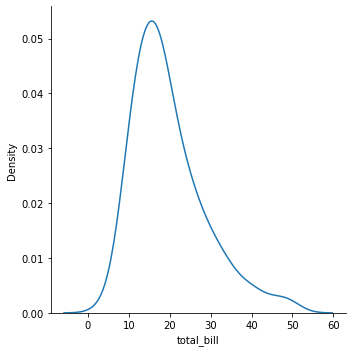

In [72]:
sns.displot(data=tips,x='total_bill',kind='kde')

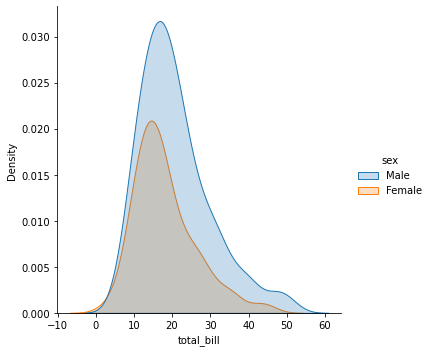

In [74]:
# hue -> fill
sns.displot(data=tips,x='total_bill',kind='kde',hue='sex',fill=True)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

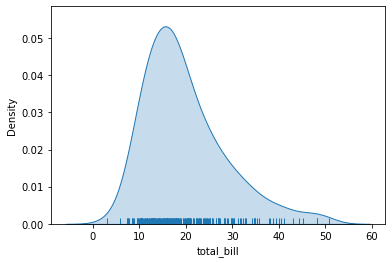

In [83]:
# Rugplot

# Plot marginal distributions by drawing ticks along the x and y axes.

# This function is intended to complement other plots by showing the location of individual observations in an unobtrusive way.
sns.kdeplot(data=tips,x='total_bill',fill=True)
sns.rugplot(data=tips,x='total_bill')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

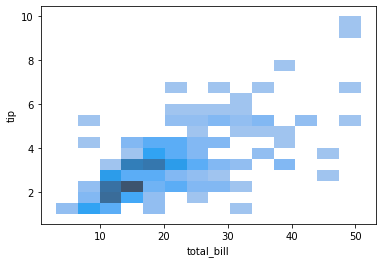

In [84]:
# Bivariate histogram
# A bivariate histogram bins the data within rectangles that tile the plot 
# and then shows the count of observations within each rectangle with the fill color

sns.histplot(data=tips,x='total_bill', y='tip')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

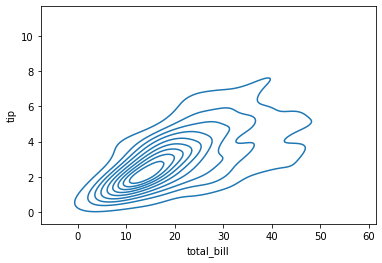

In [85]:
# Bivariate Kdeplot
# a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian
sns.kdeplot(data=tips,x='total_bill',y='tip')

## 2. Matrix Plot
- Heatmap
- Clustermap

<AxesSubplot:xlabel='year', ylabel='country'>

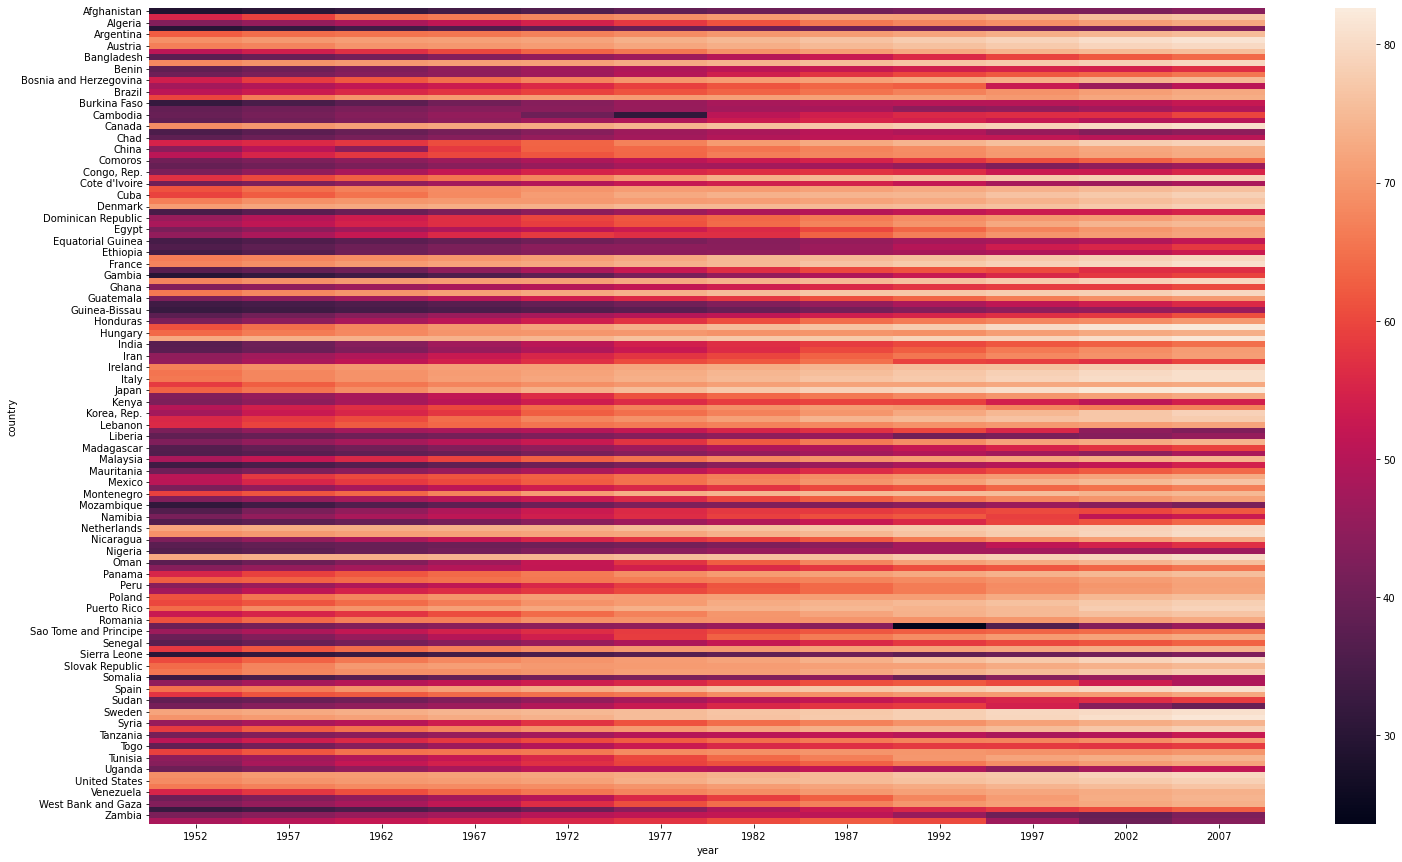

In [113]:
# Heatmap

# plot rectangular data as a color-encoded matrix
temp_df = gap.pivot(index='country',columns='year',values='lifeExp')
# axes level
plt.figure(figsize=(25,15))
sns.heatmap(temp_df)

<AxesSubplot:xlabel='year', ylabel='country'>

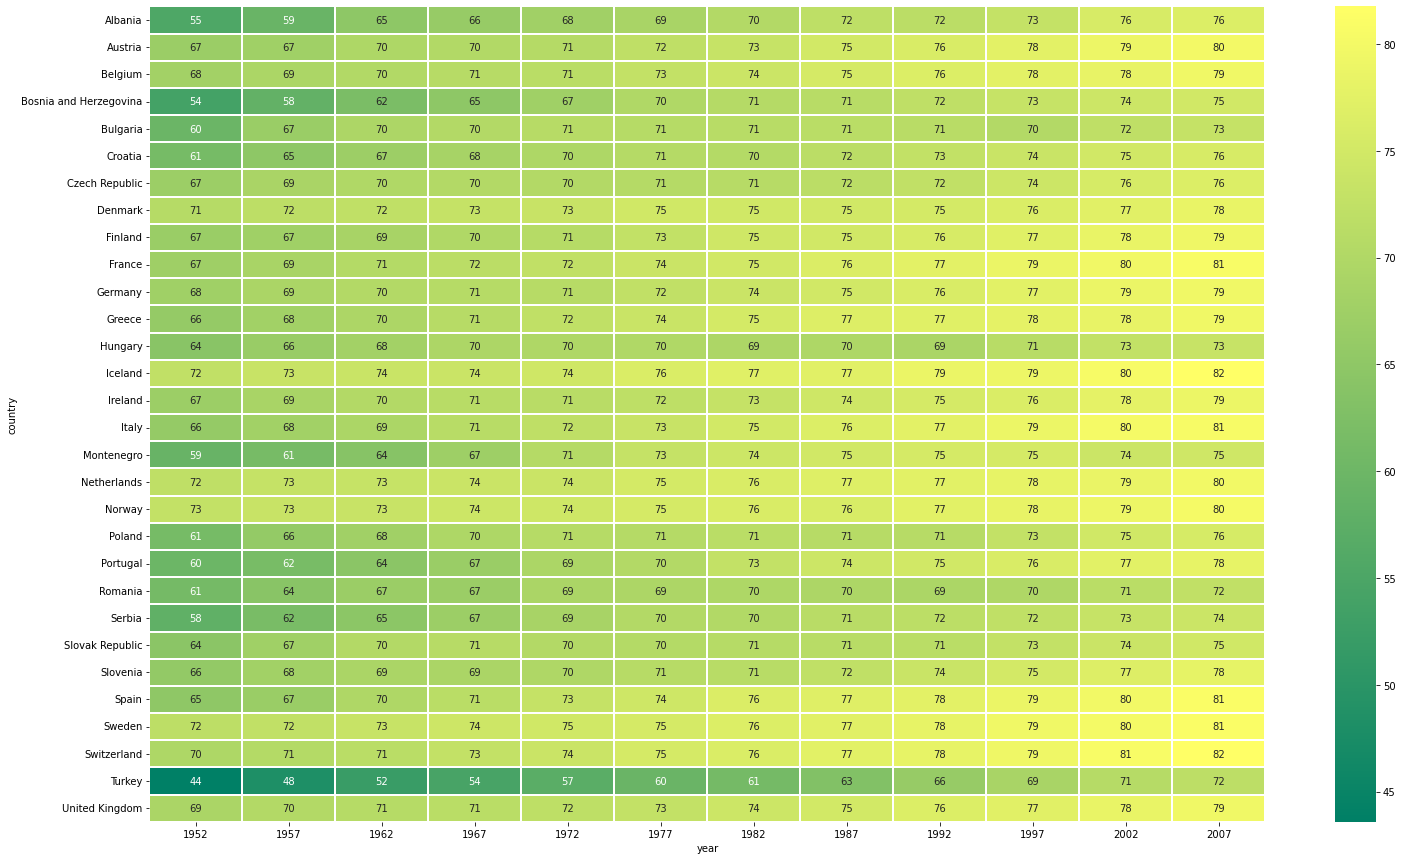

In [115]:
# annot
# linewidth
# cmap
plt.figure(figsize=(25,15))
temp_df = gap[gap['continent'] == 'Europe'].pivot(index='country',columns='year',values='lifeExp')
sns.heatmap(temp_df,annot=True,linewidths=2,cmap='summer')

In [107]:
# Clustermap

# Plot a matrix dataset as a hierarchically-clustered heatmap.

# This function requires scipy to be available.
# It is used to find similarities among rows as well as cols 

iris = px.data.iris()
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


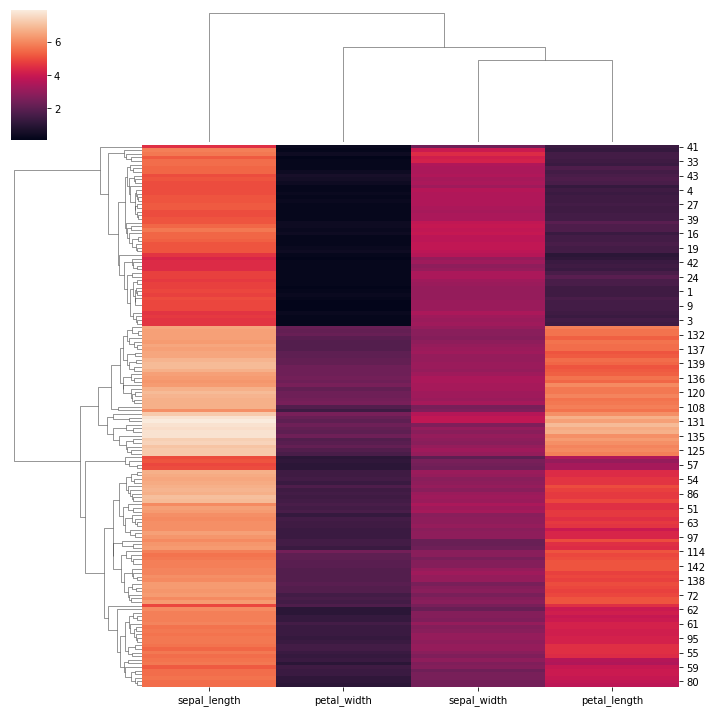

In [110]:
sns.clustermap(iris.iloc[:,[0,1,2,3]])